In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
regression_model = LinearRegression()
regression_model.fit(x_train,y_train)

print('Predicted values:', predictions)
print('Actual values:', y_test.values)
correlation_coefficient = np.corrcoef(predictions, y_test)[0, 1]
print('Correlation coefficient:', correlation_coefficient)




Predicted values: [350.42567568 229.25      ]
Actual values: [450 322]
Correlation coefficient: 0.9999999999999999


In [62]:
nba_table = pd.read_csv(r"C:\Users\lamel\Downloads\2024-2025_NBA_ppg_stats.csv", header=None)
nba_table
nba_table.columns = ['Index', 'Player', 'Age', 'Team', 'Position', 'PPG', 'PlayerID']
revised_table = nba_table.drop(columns=['Index','PlayerID','Age','Team','Position'])
revised_table
revised_table_2 = revised_table[revised_table['PPG'] > 0]
revised_table_2

revised_table_2 = revised_table_2.sort_values(by='Player')
revised_table_2
revised_table_2 = revised_table_2.drop_duplicates(subset='Player', keep='last')
revised_table_2
revised_table_2.reset_index(drop=True, inplace=True)
revised_table_2

print(revised_table_2.head())
revised_table_2 

          Player   PPG
0     A.J. Green   7.4
1    A.J. Lawson   9.1
2     AJ Johnson   7.6
3   Aaron Gordon  14.7
4  Aaron Holiday   5.5


,Player,PPG
0,A.J. Green,7.4
1,A.J. Lawson,9.1
2,AJ Johnson,7.6
3,Aaron Gordon,14.7
4,Aaron Holiday,5.5
...,...,...
555,Zach Edey,9.2
556,Zach LaVine,22.4
557,Zeke Nnaji,3.2
558,Ziaire Williams,10.0


In [77]:
salary_data = pd.read_csv(r"C:\Users\lamel\Downloads\NBA_salaries_cleaned.csv")
salary_data
salary_data = salary_data[['Player', '2024-25']]
salary_data.rename(columns={'2024-25': 'Salary'}, inplace=True)
salary_data
salary_data['Salary'] = salary_data['Salary'].replace('[\$,]', '', regex=True).astype(float)
complete_table = pd.merge(revised_table_2, salary_data[['Player', 'Salary']], on='Player', how='left')
complete_table
finished_nba_table = complete_table.dropna()
finished_nba_table

,Player,PPG,Salary
0,A.J. Green,7.4,2120693.0
1,A.J. Lawson,9.1,100000.0
2,AJ Johnson,7.6,2795294.0
3,Aaron Gordon,14.7,22841455.0
4,Aaron Holiday,5.5,4668000.0
...,...,...,...
600,Zach Edey,9.2,5756880.0
601,Zach LaVine,22.4,44531940.0
602,Zeke Nnaji,3.2,8888889.0
603,Ziaire Williams,10.0,6133005.0


In [101]:
x = finished_nba_table[['PPG']].values
y = finished_nba_table[['Salary']].values
players = finished_nba_table['Player'].values
x_train, x_test, y_train, y_test, players_train, players_test = train_test_split(x, y, players, test_size=0.2, random_state=42)
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)
predictions = regression_model.predict(x_test)
predicted_salaries = predictions.flatten()
actual_salaries = y_test.flatten()
len(actual_salaries) == len(predicted_salaries)
predicted_salaries = np.clip(predicted_salaries, 0, None)
results_table = pd.DataFrame({
    'Player': players_test,
    'PPG': x_test.flatten(),
    'Actual Salary': actual_salaries,
    'Predicted Salary': predicted_salaries
})
results_table
results_table['Actual Salary'] = results_table['Actual Salary'].apply(lambda x: f"${x:,.0f}")
results_table['Actual Salary']
results_table['Predicted Salary'] = results_table['Predicted Salary'].apply(lambda x: f"${x:,.0f}")
results_table['Predicted Salary']
results_table.head(20)

,Player,PPG,Actual Salary,Predicted Salary
0,Dillon Brooks,14.0,"$22,255,493","$16,715,390"
1,Nikola Jokić,29.6,"$51,415,938","$39,111,120"
2,Aaron Wiggins,12.0,"$10,514,017","$13,844,142"
3,Lamar Stevens,4.4,"$623,856","$2,933,402"
4,Kris Murray,4.2,"$2,990,040","$2,646,278"
5,Chris Livingston,1.4,"$1,891,857",$0
6,James Johnson,0.7,"$2,087,519",$0
7,Trayce Jackson-Davis,6.6,"$1,891,857","$6,091,774"
8,Zaccharie Risacher,12.6,"$12,569,040","$14,705,517"
9,Corey Kispert,11.6,"$5,705,887","$13,269,893"


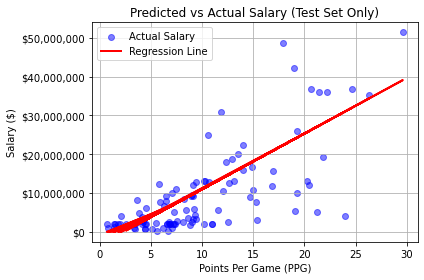

In [111]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.scatter(x_test, y_test, alpha=0.5, color='blue', label='Actual Salary')
plt.plot(x_test, predicted_salaries, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Points Per Game (PPG)')
plt.ylabel('Salary ($)')
plt.title('Predicted vs Actual Salary (Test Set Only)')
plt.legend()
plt.grid(True)
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

In [122]:
#This code is evaluating the model's performance using different metrics.
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(actual_salaries, predicted_salaries))
print('Root Mean Squared Error (RMSE):', f'${rmse:,.0f}')

mae = mean_absolute_error(actual_salaries, predicted_salaries)
print('Mean Absolute Error (MAE):', f'${mae:,.0f}')



Root Mean Squared Error (RMSE): $7,642,801
Mean Absolute Error (MAE): $5,394,918


In [133]:
#This code is creating a database using SQLite.
import sqlite3
conn = sqlite3.connect('nba_salaries.db')
cursor = conn.cursor()
results_table.to_sql('salary_predictions', conn, if_exists= 'replace', index=False)
cursor.execute('PRAGMA table_info(salary_predictions)')
columns_info = cursor.fetchall()
for i in columns_info:
    print(i)
conn.close()


(0, 'Player', 'TEXT', 0, None, 0)
(1, 'PPG', 'REAL', 0, None, 0)
(2, 'Actual Salary', 'TEXT', 0, None, 0)
(3, 'Predicted Salary', 'TEXT', 0, None, 0)


In [135]:
import joblib
joblib.dump(regression_model, 'regression_model.pkl')

['regression_model.pkl']